In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [226]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8,4)
cstyles = [i['color'] for i in plt.style.library['ggplot']['axes.prop_cycle']]

In [119]:
wbands_hs = np.arange(400,711, 5)

### SeaBass absorption distribution

In [5]:
# load a440 values from Craig et al. 2020
a440_range = pd.read_csv('data/a440_craig_et_al_2020.csv')

In [8]:
p_ternary = px.scatter_ternary(a440_range, a='aph', b='ag', c='ad', opacity=.5)

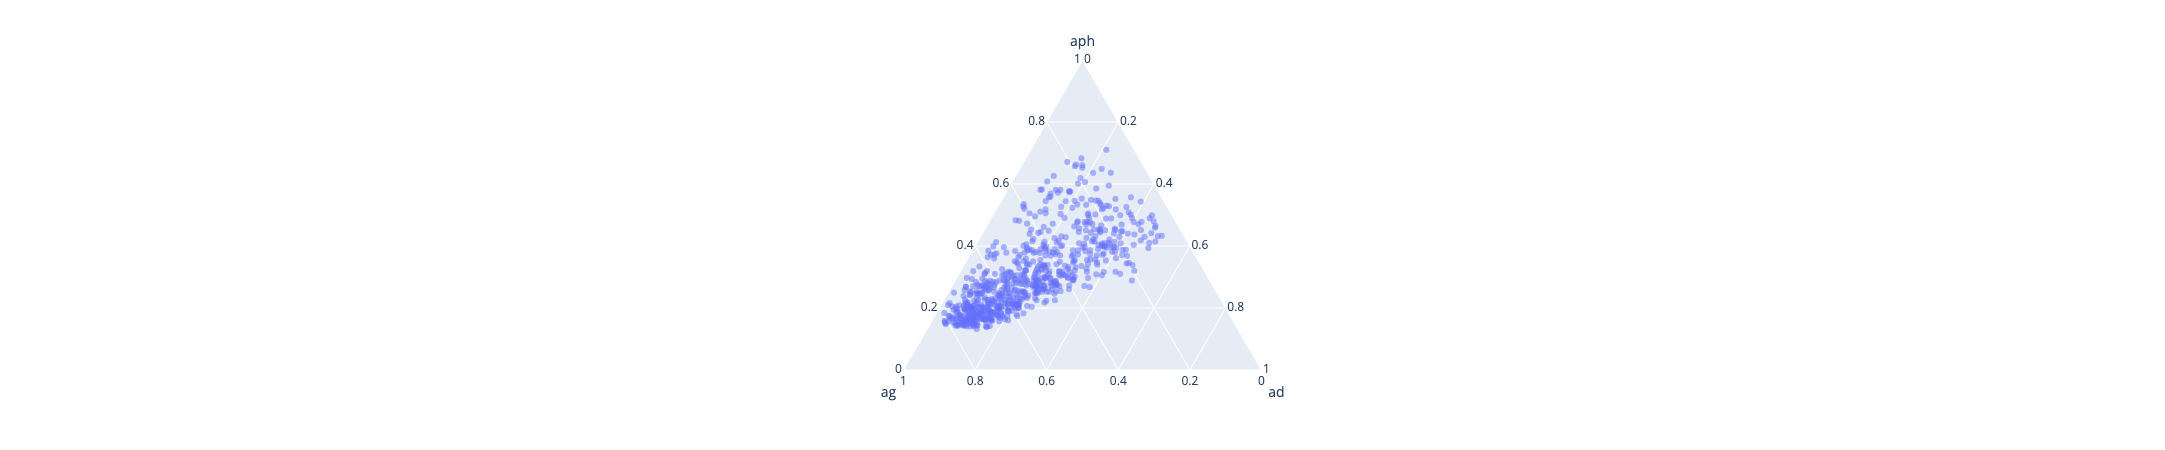

In [16]:
p_ternary.show()

### CDOM and detrital slope
See Babin et al. (2003)

In [37]:
np.random.seed(1)
# CDOM: mu = 0.0176, sd = 0.002
s_cdom = np.random.normal(.0176, .002, 1000)
# NAP: mu = 0.0123, sd = 0.0013
s_nap = np.random.normal(.0123, .0013, 1000)

Text(0.5, 0, 'slope NAP')

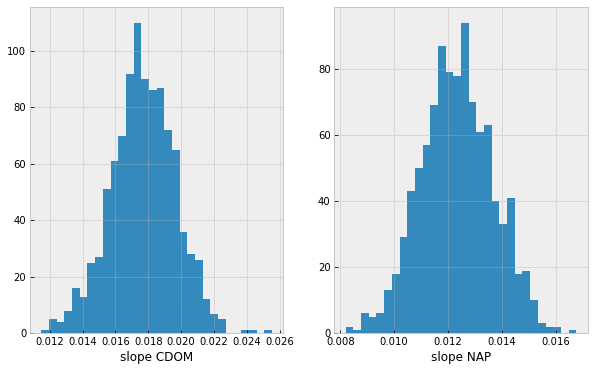

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(s_cdom, bins=30);
ax[0].set_xlabel('slope CDOM')
ax[1].hist(s_nap, bins=30);
ax[1].set_xlabel('slope NAP')

### Phytoplankton IOPs

#### Spectral absorption

In [114]:
# siop for phytoplankton
aph_s = pd.read_csv('../hydropt/data/psc_absorption_se_uitz_2008.csv', index_col='wavelength')

In [122]:
aph_s = aph_s.reindex(np.unique(np.sort(np.concatenate([aph_s.index, wbands_hs]))))\
            .interpolate()\
            .loc[wbands_hs]

In [124]:
N = 100
# sample micro absorption
a_micro = pd.DataFrame(np.array([aph_s.micro+aph_s.micro_se*i for i in np.random.randn(N)]).T,
                       columns=[i for i in range(N)], index=aph_s.index)
# sample nano absorption
a_nano = pd.DataFrame(np.array([aph_s.nano+aph_s.nano_se*i for i in np.random.randn(N)]).T,
                       columns=[i for i in range(N)], index=aph_s.index)
# sample pico absorption
a_pico = pd.DataFrame(np.array([aph_s.pico+aph_s.pico_se*i for i in np.random.randn(N)]).T,
                       columns=[i for i in range(N)], index=aph_s.index)

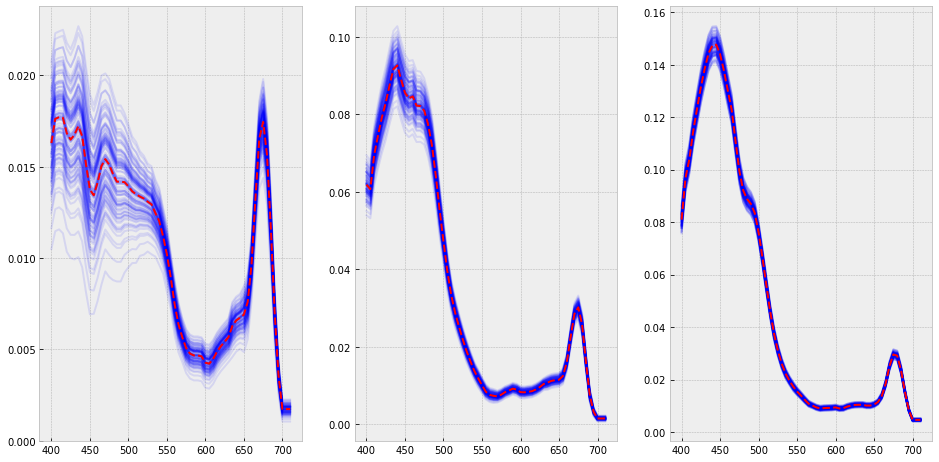

In [240]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
# micros
ax[0].plot(a_micro, alpha=.1, color='blue');
ax[0].plot(a_micro.mean(axis=1), color='red', linestyle='--');

# nanos
ax[1].plot(a_nano, color='blue', alpha=.1);
ax[1].plot(a_nano.mean(axis=1), color='red', linestyle='--');
# picos
ax[2].plot(a_pico, color='blue', alpha=.1);
ax[2].plot(a_pico.mean(axis=1), color='red', linestyle='--');

#### Backscatter

In [183]:
# specific backscatter coefficient pico/nano
bb_star_pn = .0038
# standard error specific backscatter coefficient pico/nano
bb_star_pn_se = .0006
# spectral slope pico/nano
gamma_pn = 1.4
# standard error spectral slope
gamma_pn_se = .35

# specific backscatter coefficient micro
bb_star_m = .0004
# standard error specific backscatter coefficient pico/nano
bb_star_m_se = .0002
# spectral slope pico/nano
gamma_m = -.4
# standard error spectral slope
gamma_m_se = 1.1

# spectral specific backscatter 
def bbp(bb_star, gamma, waveb):
    return bb_star*(waveb/470)**-gamma

# create distribution for spectral backscatter coefficients
bbp_pn = pd.DataFrame(np.array([bbp(i*bb_star_pn_se+bb_star_pn, i*gamma_pn_se+gamma_pn, wbands_hs) for i in np.random.randn(N)]).T,
                      columns=[i for i in range(N)], index=wbands_hs)

bbp_m = pd.DataFrame(np.array([bbp(i*bb_star_m_se+bb_star_m, i*gamma_m_se+gamma_m, wbands_hs) for i in np.random.randn(N)]).T,
                     columns=[i for i in range(N)], index=wbands_hs)

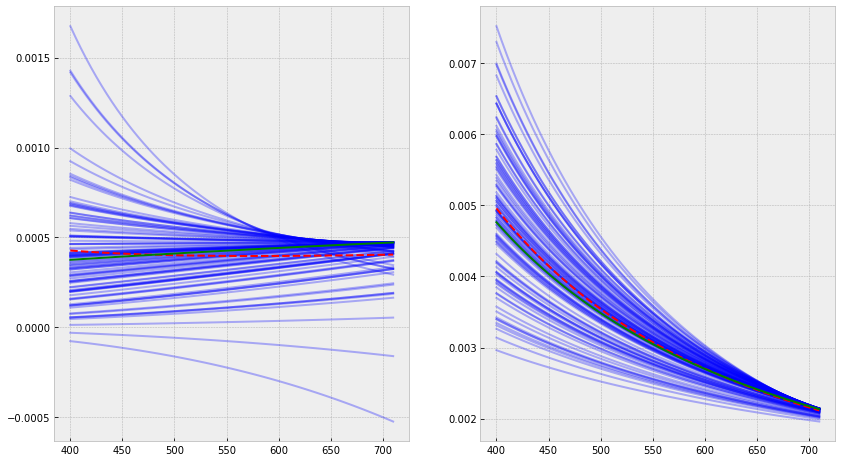

In [184]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
# micros
ax[0].plot(bbp_m, color='blue', alpha=.3);
ax[0].plot(bbp_m.mean(axis=1), color='red', linestyle='--');
ax[0].plot(wbands_hs, bbp(bb_star_m, gamma_m, wbands_hs), color='green')
# pico-nanos
ax[1].plot(bbp_pn, color='blue', alpha=.3);
ax[1].plot(bbp_pn.mean(axis=1), color='red', linestyle='--');
ax[1].plot(wbands_hs, bbp(bb_star_pn, gamma_pn, wbands_hs), color='green')